In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random, time, math

1. С моделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

0.00251 seconds


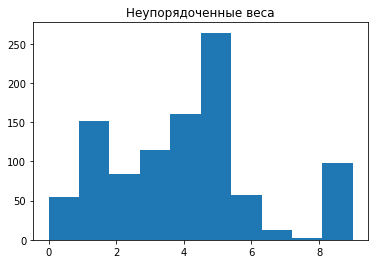

In [47]:
N = 1000
a = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]
start_time = time.time()
a = (np.asarray(a) / sum(a)).cumsum()
num = np.searchsorted(a, np.random.rand(1000))
print("%.5f seconds" % (time.time() - start_time))
plt.hist(num)
plt.title("Неупорядоченные веса")
plt.show()

0.00171 seconds


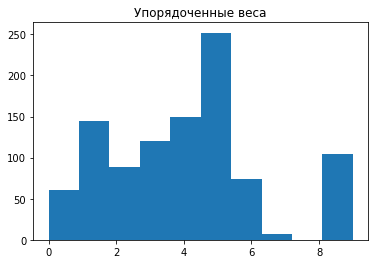

In [46]:
N = 1000
a = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]
start_time = time.time()
ind = np.argsort(a)[::-1]
a = np.sort(a)[::-1]
a = (np.asarray(a) / sum(a)).cumsum()
num = ind[np.searchsorted(a, np.random.rand(1000))]
print("%.5f seconds" % (time.time() - start_time))
plt.hist(num)
plt.title("Упорядоченные веса")
plt.show()


2. Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

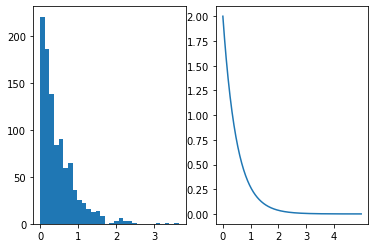

In [113]:
Lambda = 2
N = 1000
num = [-math.log(1 - random.uniform(0, 1)) / Lambda for i in range(N)]
fig, ax = plt.subplots(1,2)
ax[0].hist(num, bins = 30)
xlist = np.arange(0, 5, 0.01)
ylist = list(map(lambda v : Lambda * math.exp(- Lambda * v), xlist))
ax[1].plot(xlist, ylist)
plt.xticks(np.arange(0, 5, 1))
plt.show()

3. Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

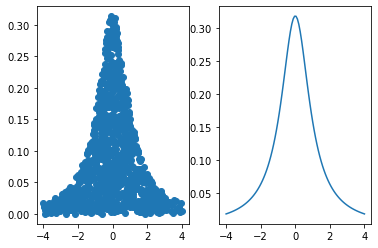

In [161]:
from scipy import stats
N = 1000
points = []
while(N > 0):
    x, y = random.uniform(-4, 4), random.uniform(0, 1)
    if dist.pdf(x) >= y:
        points.append([x,y])
        N-=1
points = np.array(points)
fig, ax = plt.subplots(1,2)
ax[0].scatter(points[:, 0], points[:, 1])
x = np.linspace(-4, 4, 100)
ax[1].plot(x, dist.pdf(x))
plt.show()

4. Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

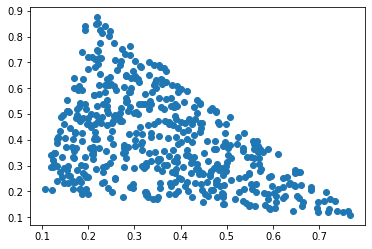

In [207]:
N = 500
x = np.array([random.uniform(0,1) for i in range(N)])
y = np.array([random.uniform(0,1) for i in range(N)])
x, y = x/2**(1/2) + y/2**(1/2), x/2**(1/2) - y/2**(1/2) 
y[y < 0]*=-1
x, y = 1 - x/2**(1/2) - y/2**(1/2), x/2**(1/2) - y/2**(1/2) 
x,y = 0.7 * x + 0.1 * y + 0.1, -0.1 * x+0.7*y + 0.2
plt.scatter(x,y)
plt.show()

5. Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

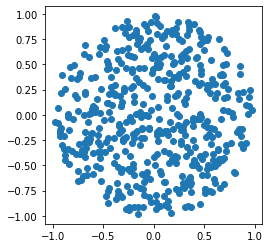

In [31]:
N = 500
r = np.sqrt(np.array([random.uniform(0, 1) for i in range(N)]))
phi = np.array([random.uniform(0, 2 * np.pi) for i in range(N)])
plt.scatter(r*np.cos(phi), r*np.sin(phi))
plt.axis('scaled') 
plt.show()

6. Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

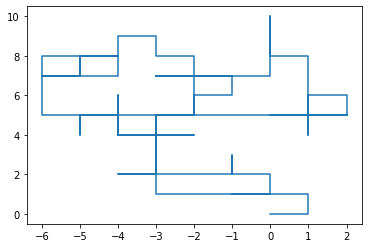

In [268]:
def edit(a):
    k = len(a)
    s = -math.copysign(1, sum(a))
    while(np.sum(a) != 0):
        a[random.randint(0, k)] = s
    return a 
N = 100
x = edit(np.array([random.choice([-1,1]) for i in range(N)]))
y = edit(np.array([random.choice([-1, 1]) for i in range(N)]))
x, y = x/2**(1/2) + y/2**(1/2), x/2**(1/2) - y/2**(1/2) 
x/= 2**(1/2)
y/=2**(1/2)
plt.plot(x.cumsum(), y.cumsum())
plt.show()

7. Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

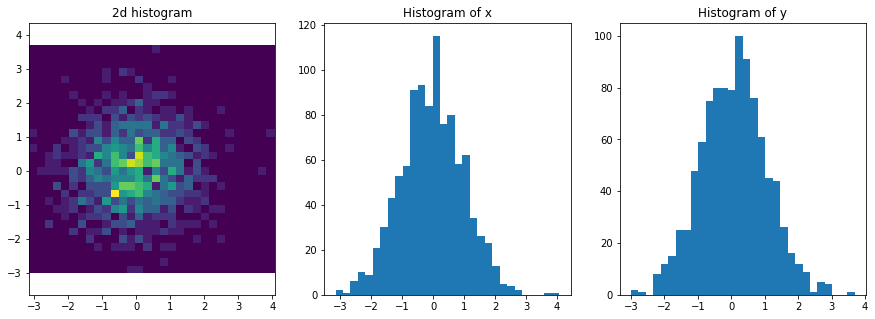

In [49]:
n = 1000
x = np.zeros(1000)
y = np.zeros(1000)
k = 0
while k < 1000:
    d = random.uniform(-1,1)
    v = random.uniform(-1,1)
    s = d * d + v * v
    if s <= 1 and s > 0:
        x[k] = d * math.sqrt((-2) * np.log(s)/s)
        y[k] = v * math.sqrt((-2) * np.log(s)/s)
        k = k + 1
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

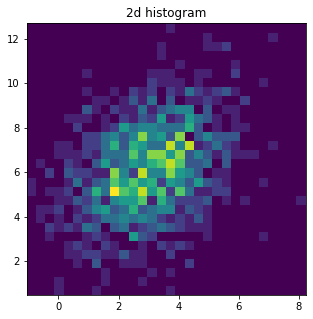

In [64]:
x1= x + y + 3 
y1=(1 - math.sqrt(7)) / 2 * x + (1 + math.sqrt(7)) / 2 * y + 6 
plt.figure(figsize=(5,5))
plt.hist2d(x1, y1, bins=30) 
plt.title("2d histogram") 
plt.show()

8. Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [8]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

In [62]:
N = np.zeros((8,1))
for i in range (8):
    N[i] = np.random.normal(0,1,1)
C = np.linalg.cholesky(B[:8, :8])
string = (C[0:1] + C[4:5])*(-1)
G = np.concatenate((C, string), axis = 0)
L = np.concatenate((G, np.zeros((9,1))), axis = 1)
print(np.dot(L,L.T))

[[ 2.  0.  0.  0. -1.  0.  0.  0. -1.]
 [ 0.  4.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.  0. -1.  0.  0.]
 [ 0. -1.  0.  4.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  2.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  4.  0. -1.  0.]
 [ 0.  0. -1.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  4.  0.]
 [-1.  0.  0.  0. -1.  0.  0.  0.  2.]]


9. С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число π. Теоретически обоснуйте необходимое число бросаний, чтобы оценить число π с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

In [74]:
N = 1000000
x, y = np.random.rand(2, N)
4*len(np.where( x*x + y*y <= 1)[0])/N

3.14124

Ели Хi - сл величина, принимающая 1 если точка попала в круг и 0 иначе. Если у нас Y - сумма N случайных величин, то по неравенству Чебышева P(|Y/N - EY/N| > eps) < DY/eps^2/N^2. Отсюда получаем N около 300 миллионов.

10. Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов. 

In [94]:
def Cnk (n,k):
    a = 1
    if k != 0:
        a = (math.factorial(n)/(math.factorial(k) * math.factorial(n - k)))
    return a

B = np.zeros(101)
B[0] = 1
for i in range(1, 101):
    s = 0
    for j in range(i):
        s += Cnk(i-1,j) * B[j]
    B[i] = s
sum = 0
for i in range(1000):
    x = random.random()
    s = 0
    K = 0
    while(s < x):
        K += 1
        s += K ** 100 / (math.factorial(K) * np.e * B[100])
    C = np.random.randint(1, K + 1, 100)
    sum += len(np.unique(C))
print(sum / 1000)

28.567
